# CHAPTER 8 ASSIGNMENT

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
avocado_sales = pd.read_csv('avocado.csv')
avocado_sales.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
avocado_sales['Date'] = pd.to_datetime(avocado_sales['Date'])
avocado_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [7]:
sort_data = avocado_sales.query("Date.dt.year == 2015 and type == 'conventional' and region == 'Albany'")
sort_data = sort_data[['Date', 'Total Bags', 'Small Bags']]
print(sort_data.head())

        Date  Total Bags  Small Bags
0 2015-12-27     8696.87     8603.62
1 2015-12-20     9505.56     9408.07
2 2015-12-13     8145.35     8042.21
3 2015-12-06     5811.16     5677.40
4 2015-11-29     6183.95     5986.26


In [8]:
melted_data = sort_data.melt(id_vars=['Date'], value_vars=['Total Bags', 'Small Bags'], var_name='Bags', value_name='Count')
melted_data

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
99,2015-02-01,Small Bags,9170.82
100,2015-01-25,Small Bags,10103.35
101,2015-01-18,Small Bags,11651.09
102,2015-01-11,Small Bags,8036.04


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


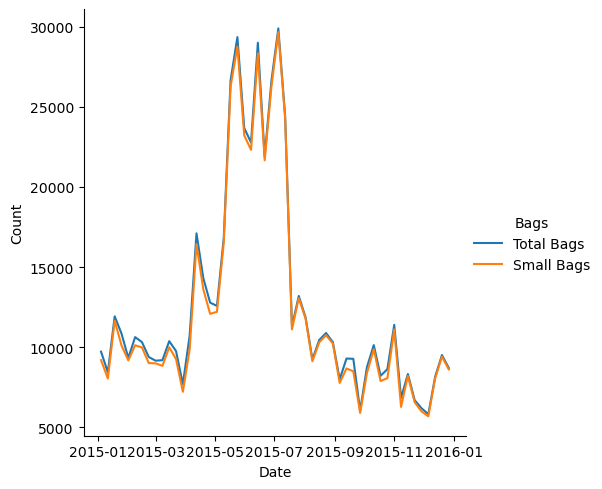

In [9]:
sns.relplot(data=melted_data, kind='line', x='Date', y='Count', hue='Bags')

In [10]:
quantile_labels = ['Poor', 'Modest', 'Good', 'Excellent']
bin_bounds = [0, avocado_sales['Total Volume'].quantile(0.25), avocado_sales['Total Volume'].quantile(0.5), avocado_sales['Total Volume'].quantile(0.75), avocado_sales['Total Volume'].max()]
avocado_sales['Sales Volume'] = pd.cut(avocado_sales['Total Volume'], bins=bin_bounds, labels=quantile_labels)
avocado_sales.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Sales Volume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Modest


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

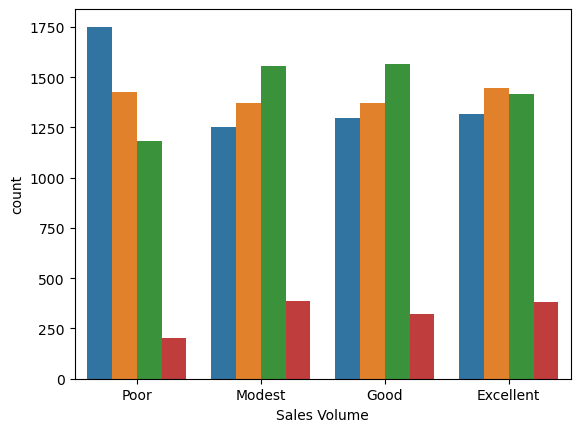

In [11]:
sns.countplot(data=avocado_sales, x='Sales Volume', hue='year')

In [14]:
melted_df = avocado_sales.melt(id_vars=['Date'], value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], var_name='Bags', value_name='Count')
print(melted_df.head)

<bound method NDFrame.head of             Date         Bags    Count
0     2015-12-27   Small Bags  8603.62
1     2015-12-20   Small Bags  9408.07
2     2015-12-13   Small Bags  8042.21
3     2015-12-06   Small Bags  5677.40
4     2015-11-29   Small Bags  5986.26
...          ...          ...      ...
54742 2018-02-04  XLarge Bags     0.00
54743 2018-01-28  XLarge Bags     0.00
54744 2018-01-21  XLarge Bags     0.00
54745 2018-01-14  XLarge Bags     0.00
54746 2018-01-07  XLarge Bags     0.00

[54747 rows x 3 columns]>


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


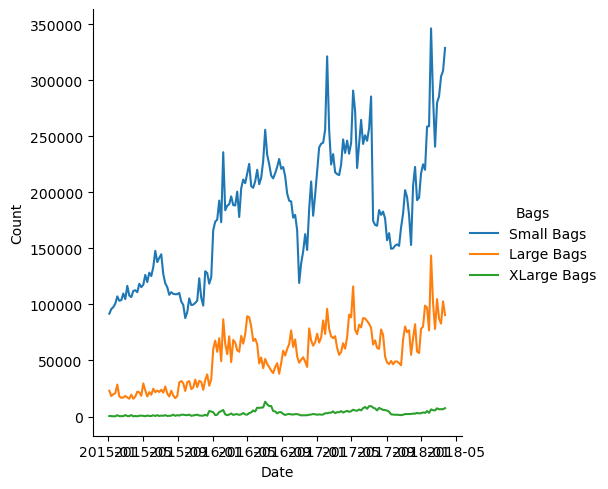

In [16]:
sns.relplot(data=melted_df, kind='line', x='Date', y='Count', hue='Bags', errorbar=None)

## Small Bags sells the best